# Creating C1 text versions

<br>

**Language: Python**

This notebook shows the process used for creating a set of 10 texts from the C1 base text by carefully manipulating collocational sophistication and accuracy. See dissertation section 6.1.1.1.

**Notebook contents:**
- [Initial setup](#Initial-setup)
- [New columns](#New-columns)
- [C1 texts](#B2-texts)
    - [Text 21](#Text-21)
    - [Text 22](#Text-22)
    - [Text 23](#Text-23)
    - [Text 24](#Text-24)
    - [Text 25](#Text-25)
    - [Text 26](#Text-26)
    - [Text 27](#Text-27)
    - [Text 28](#Text-28)
    - [Text 29](#Text-29)
    - [Text 30](#Text-30)
- [Final C1 dataframe](#Final-C1-dataframe)  

In total, there are 33 different text versions:
- 10 in B1
- 10 in B2
- 10 in C1
- 3 control texts (the normalized texts for each level)

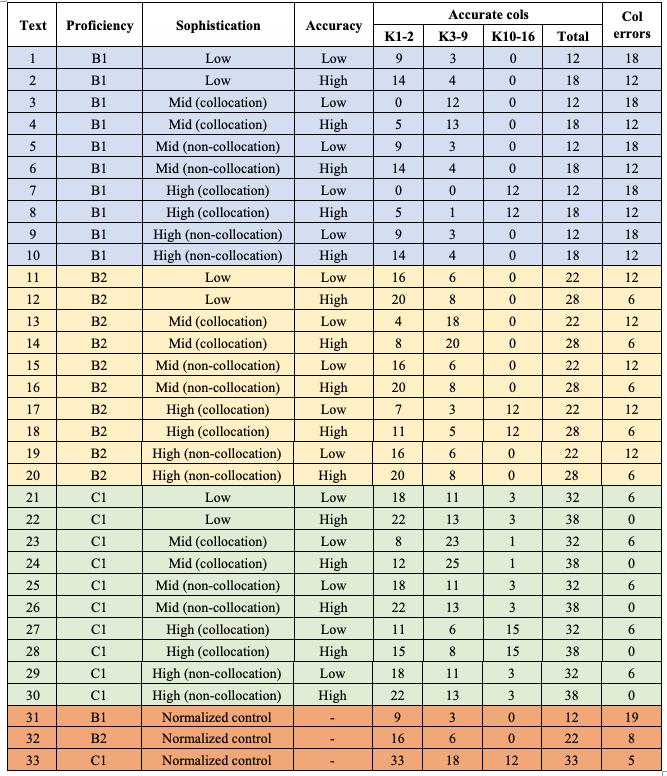

## Initial setup

In [1]:
# Import necessary modules

import pandas as pd
import pprint
from IPython.core.interactiveshell import InteractiveShell
import joblib

In [2]:
# Set preferred notebook format

InteractiveShell.ast_node_interactivity = "all" # Show all output, not just last item
pd.set_option('display.max_columns', 999) # Allow viewing of all columns

In [3]:
# Load necessary dictionary

kband_dict = joblib.load('../../COCA_data/COCA_2020_lemma_Kband_dict.pkl') # All items lower-case

**Note:** As described in the [README.md]('../README.md'), The frequency information from COCA referenced here is not freely available but can be purchased at https://corpus.byu.edu/coca. Without this data you will be able to see a few rows of these dataframes, but will not be able to run the code yourself. 

Using the code below, these data were queried to find potential collocation replacements (a frequency-based approach to collocation identification), followed by manual selection based on best fit and the checklist described in dissertation section 5.2.1 (a phraseological approach to collocation identification).

In [4]:
# Code to look up possible collocates

cols_df = joblib.load('../../COCA_data/COCA_2020_collocate_df.pkl')

# Example - adjectives that collocate with the adverb 'spiritually'
cols_df.loc[(cols_df.lem_PoS == ('spiritually','r')) & (cols_df.collPoS == 'j')].sort_values('MI',ascending=False).head()

,lemRank,lemma,lemPoS,coll,collPoS,freq,MI,coll_before_node,lem_PoS,coll_PoS,collocation
3196157,11070,spiritually,r,uplifting,j,22,8.66,0.05,"(spiritually, r)","(uplifting, j)","((spiritually, r), (uplifting, j))"
3196267,11070,spiritually,r,enriching,j,5,8.05,0.00,"(spiritually, r)","(enriching, j)","((spiritually, r), (enriching, j))"
3196251,11070,spiritually,r,bereft,j,6,7.58,0.00,"(spiritually, r)","(bereft, j)","((spiritually, r), (bereft, j))"
3196227,11070,spiritually,r,adrift,j,7,7.41,0.14,"(spiritually, r)","(adrift, j)","((spiritually, r), (adrift, j))"
3196253,11070,spiritually,r,evolved,j,6,7.28,0.00,"(spiritually, r)","(evolved, j)","((spiritually, r), (evolved, j))"


In [5]:
# Read in PSL3 list

f = open("../docs/psl3.txt", "r")
PSL3 = f.read()
PSL3 = sorted(PSL3.split('\n'))

In [6]:
# Load pickle file from previous notebook

texts_df = joblib.load('../docs/base_texts.pkl')
texts_df = texts_df.loc[[2]]
texts_df

,text_id,text,lemmas_NLTK,lemmas_CLAWS,correct_cols,col_errors,K1to2,K3to9,K10to16,kband_cols,K1to2_cols,K3to9_cols,K10to16_cols,bad_cols,kband_non_cols
2,text21,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,18,11,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."


## C1 texts

All high-freq collocations are also checked for _inclusion_ in PSL3. All mid-freq and low-freq collocations are checked for _exclusion_ from PSL3.

### Text 21
- Already in dataframe

### Text 22
- C1
- low sophistication
- high accuracy

Use Text 21 as base (low sophistication/low accuracy) and then correct all 6 collocation errors (four K1-2, two K3-9).  

**Note:** The ideal would be two add:
- 3 new correct K1-K2 collocations
- 2 new correct K3-9 collocations
- 1 new correct K10-16 collocation  

However, the ratio is 4, 2, 0.

In [7]:
# C1 bad cols

texts_df.loc[texts_df.text_id == 'text21','bad_cols'].to_list()

[['agree to the statement',
  'in the weekends',
  'collect some pocket money',
  'computer organization',
  'making a straight contribution',
  'in summing up']]

In [8]:
# Find freq bands of bad cols

C1_bad_cols_CLAWS = [[('agree', 'v'), ('to', 'i'), ('the','a'),('statement','n')],
                     [('in','i'),('the', 'a'), ('weekend', 'n')],
                     [('collect','v'),('some', 'd'), ('pocket', 'n'),('money','n')],
                     [('computer', 'n'), ('organization', 'n')],
                     [('straight', 'j'), ('contribution', 'n')],
                     [('in', 'i'), ('sum','v'),('up', 'r')]]

In [9]:
C1_bad_cols_kband = [[(i,kband_dict[i]) for i in x] for x in C1_bad_cols_CLAWS]
C1_bad_cols_kband = sorted([(max([i[1] for i in x]),[i[0] for i in x]) for x in C1_bad_cols_kband])
C1_bad_cols_kband

# Three K1-2 bad cols and three K3-9 bad cols

[(1, [('agree', 'v'), ('to', 'i'), ('the', 'a'), ('statement', 'n')]),
 (1, [('computer', 'n'), ('organization', 'n')]),
 (2, [('collect', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n')]),
 (2, [('in', 'i'), ('the', 'a'), ('weekend', 'n')]),
 (3, [('straight', 'j'), ('contribution', 'n')]),
 (6, [('in', 'i'), ('sum', 'v'), ('up', 'r')])]

In [10]:
# Original lemmas 1 (K1-2)
kband_dict[('agree', 'v')]
kband_dict[('to', 'i')]
kband_dict[('the', 'a')]
kband_dict[('statement', 'n')]

# New lemmas (K1-2)
kband_dict[('agree', 'v')]
kband_dict[('with', 'i')]
kband_dict[('the', 'a')]
kband_dict[('statement', 'n')]

'agree' in PSL3
'statement' in PSL3 # interesting!

1

1

1

1

1

1

1

1

True

False

In [11]:
# Original lemmas 2 (K1-2)
kband_dict[('computer', 'n')]
kband_dict[('organization', 'n')]

# New lemmas (K1-2)
kband_dict[('technology', 'n')]
kband_dict[('company', 'n')]

'computer' in PSL3
'organization' in PSL3
'technology' in PSL3
'company' in PSL3

1

1

1

1

True

True

True

True

In [12]:
# Original lemmas 3 (K1-2)
kband_dict[('collect', 'v')]
kband_dict[('some', 'd')]
kband_dict[('pocket', 'n')]
kband_dict[('money', 'n')]

# New lemmas (K1-2)
kband_dict[('earn', 'v')]
kband_dict[('some', 'd')]
kband_dict[('pocket', 'n')]
kband_dict[('money', 'n')]

'collect' in PSL3
'earn' in PSL3

2

1

2

1

2

1

2

1

True

True

In [13]:
# Original lemmas 4 (K1-2)
kband_dict[('in', 'i')]
kband_dict[('the', 'a')]
kband_dict[('weekend', 'n')]

# New lemmas (K1-2)
kband_dict[('on', 'i')]
kband_dict[('the', 'a')]
kband_dict[('weekend', 'n')]

'weekend' in PSL3

1

1

2

1

1

2

True

In [14]:
# Original lemmas 5 (K3-9)
kband_dict[('straight', 'j')]
kband_dict[('contribution', 'n')]

# New lemmas (K3-9)
kband_dict[('direct', 'j')]
kband_dict[('contribution', 'n')]

'straight' in PSL3
'contribution' in PSL3
'direct' in PSL3

3

3

2

3

True

True

True

In [15]:
# Original lemmas 6 (K3-9)
kband_dict[('in', 'i')]
kband_dict[('sum', 'v')]
kband_dict[('up', 'r')]

# New lemmas (K3-9)
kband_dict[('to', 't')]
kband_dict[('sum', 'v')]
kband_dict[('up', 'r')]

'sum' in PSL3

1

6

1

1

6

1

True

Summary of changes:

K1-2
1. agree to the statement -> agree with the statement
2. computer organization -> technology company
3. collect some pocket money -> earn some pocket money
4. in the weekends -> on the weekend

K3-9
5. straight contibution -> direct contribution
6. in summing up -> to sum up

In [16]:
# New text22 cols

text22_new_K1to2_cols = [(1, [('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n')]),
                          (1, [('technology', 'n'), ('company', 'n')]),
                          (2, [('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n')]),
                          (2, [('in', 'i'), ('the', 'a'), ('weekend', 'n')])]

text22_new_K3to9_cols = [(3, [('direct', 'j'), ('contribution', 'n')]),
                         (6, [('in', 'i'), ('sum', 'v'), ('up', 'r')])]

In [17]:
# New text22

text22_text = "I do agree with the statement that children brought up in poor families.\nChildren of poor parents are prematurely exposed to problems of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to see the 'realities' of life in their home or social environment. Their parents own struggles serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Many children eg work on the weekend to either earn some pocket money or even contribute to their families' income. A good example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families in terms of labor or income.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his talent and motivation to set up the worlds largest technology company.\nHowever, there are some problems that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nTo sum up, children with impoverished backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [18]:
# New text22_lemmasNLTK

text22_lemmasNLTK = ['I', 'do', 'agree', 'with', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'poor', 'parent', 'be', 'prematurely', 'expose', 'to', 'problem', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'see', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'social', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'serve', 'as', 'a', 'example', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'necessary', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'many', 'child', 'eg', 'work', 'on', 'the', 'weekend', 'to', 'either', 'earn', 'some', 'pocket', 'money', 'or', 'even', 'contribute', 'to', 'their', 'family', "'", 'income', '.', 'A', 'good', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'direct', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'income', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'improve', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'talent', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'large', 'technology', 'company', '.', 'however', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'to', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [19]:
# New text22_lemmasCLAWS

text22_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('see', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('necessary', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('many', 'd'), ('child', 'n'), ('eg', 'r'), ('work', 'v'), ('on', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('either', 'r'), ('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('contribute', 'v'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('good', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('direct', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('income', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('improve', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('talent', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('large', 'j'), ('technology', 'n'), ('company', 'n'), ('however', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('to', 't'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [20]:
# New text22 col columns

text21_kband_cols = texts_df.loc[texts_df.text_id == 'text21'].kband_cols.to_list()[0]
text21_K1to2_cols = texts_df.loc[texts_df.text_id == 'text21'].K1to2_cols.to_list()[0]
text21_K3to9_cols = texts_df.loc[texts_df.text_id == 'text21'].K3to9_cols.to_list()[0]
text21_K10to16_cols = texts_df.loc[texts_df.text_id == 'text21'].K10to16_cols.to_list()[0]
text21_kband_non_cols = texts_df.loc[texts_df.text_id == 'text21'].kband_non_cols.to_list()[0]
text21_bad_cols = texts_df.loc[texts_df.text_id == 'text21'].bad_cols.to_list()[0]

text22_K1to2_cols = text21_K1to2_cols + text22_new_K1to2_cols
text22_K3to9_cols = text21_K3to9_cols + text22_new_K3to9_cols
text22_K10to16_cols = text21_K10to16_cols
text22_kband_cols = text22_K1to2_cols + text22_K3to9_cols + text22_K10to16_cols
text22_kband_non_cols = text21_kband_non_cols
text22_bad_cols = []

In [21]:
# Create new row for text22

text22 = {'text_id':'text22','text':text22_text,'lemmas_NLTK':text22_lemmasNLTK,'lemmas_CLAWS':text22_lemmasCLAWS,
        'correct_cols':len(text22_kband_cols),'col_errors':len(text22_bad_cols),
        'K1to2':len(text22_K1to2_cols),'K3to9':len(text22_K3to9_cols),'K10to16':len(text22_K10to16_cols),
        'kband_cols':text22_kband_cols,'K1to2_cols':text22_K1to2_cols,'K3to9_cols':text22_K3to9_cols,'K10to16_cols':text22_K10to16_cols,
        'bad_cols':text22_bad_cols,'kband_non_cols':text22_kband_non_cols}

texts_df = texts_df.append(text22, ignore_index=True)

<ipython-input-21-309959d93a2c>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text22, ignore_index=True)


In [22]:
texts_df.loc[texts_df.text_id == 'text22'].text.to_list()[0]

"I do agree with the statement that children brought up in poor families.\nChildren of poor parents are prematurely exposed to problems of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to see the 'realities' of life in their home or social environment. Their parents own struggles serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Many children eg work on the weekend to either earn some pocket money or even contribute to their families' income. A good example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families in terms of labor or income.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an i

### Text 23
- C1
- Mid sophistication (collocations)
- Low accuracy

Use text21 as base (low accuracy/low sophistication) and then adjust sophistication of 12 collocations: 
- 8 K1-2 (-10 from text21)
- 23 K3-9 (+12 from text21)
- 1 K10-16 (-2 from text21)

In [23]:
# Find non K3-9 cols to change

texts_df.loc[texts_df.text_id == 'text21', 'K1to2_cols'].to_list()
texts_df.loc[texts_df.text_id == 'text21', 'K10to16_cols'].to_list()

[[(1, [('poor', 'j'), ('family', 'n')]),
  (1, [('poor', 'j'), ('parent', 'n')]),
  (2, [('learn', 'v'), ('to', 't'), ('survive', 'v')]),
  (2, [('low', 'j'), ('family', 'n'), ('income', 'n')]),
  (1, [('reality', 'n'), ('of', 'i'), ('life', 'n')]),
  (1, [('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n')]),
  (1, [('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n')]),
  (2, [('teach', 'v'), ('necessary', 'j'), ('skill', 'n')]),
  (1,
   [('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n')]),
  (2, [('contribute', 'v'), ('to', 'i')]),
  (1, [('good', 'j'), ('example', 'n')]),
  (1, [('at', 'i'), ('the', 'a'), ('market', 'n')]),
  (1, [('in', 'i'), ('term', 'n'), ('of', 'i')]),
  (1, [('set', 'v'), ('high', 'j'), ('goal', 'n')]),
  (2,
   [('improve', 'v'),
    ('their', 'a'),
    ('economic', 'j'),
    ('and', 'c'),
    ('social', 'j'),
    ('situation', 'n')]),
  (2, [('poor', 'j'), ('background', 'n')]),
  (1, [('turn', 'v'), ('to', 'i'), ('cr

[[(14, [('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i')]),
  (10, [('highly', 'r'), ('motivated', 'j')]),
  (10, [('impoverished', 'j'), ('background', 'n')])]]

In [24]:
# Original lemmas 1 (K1-2)
kband_dict[('learn', 'v')]
kband_dict[('to', 't')]
kband_dict[('survive', 'v')]

# New lemmas (K3-9)
kband_dict[('learn', 'v')]
kband_dict[('to', 't')]
kband_dict[('cope', 'v')]

'learn' in PSL3
'survive' in PSL3
'cope' in PSL3

1

1

2

1

1

4

True

True

False

In [25]:
# Original lemmas 2 (K1-2)
kband_dict[('poor', 'j')]
kband_dict[('parent', 'n')]

# New lemmas (K3-9)
kband_dict[('humble', 'j')]
kband_dict[('parent', 'n')]

'poor' in PSL3
'parent' in PSL3
'humble' in PSL3

1

1

6

1

True

True

False

In [26]:
# Original lemmas 3 (K1-2)
kband_dict[('social', 'j')]
kband_dict[('environment', 'n')]

# New lemmas (K3-9)
kband_dict[('surrounding', 'j')]
kband_dict[('environment', 'n')]

'social' in PSL3
'environment' in PSL3
'surrounding' in PSL3

1

1

6

1

True

True

False

In [27]:
# Original lemmas 4 (K1-2)
kband_dict[('teach', 'v')]
kband_dict[('necessary', 'j')]
kband_dict[('skill', 'n')]

# New lemmas (K3-9)
kband_dict[('teach', 'v')]
kband_dict[('fundamental', 'j')]
kband_dict[('skill', 'n')]

'necessary' in PSL3
'fundamental' in PSL3

1

2

1

1

3

1

True

False

In [28]:
# Original lemmas 5 (K1-2)
kband_dict[('contribute', 'v')]
kband_dict[('to', 'i')]

# New lemmas (K3-9)
kband_dict[('occasionally', 'r')]
kband_dict[('supplement', 'v')]

'contribute' in PSL3
'occasionally' in PSL3
'supplement' in PSL3

2

1

3

8

True

False

False

In [29]:
# Original lemmas 6 (K1-2)
kband_dict[('good', 'j')]
kband_dict[('example', 'n')]

# New lemmas (K3-9)
kband_dict[('concrete', 'j')]
kband_dict[('example', 'n')]

'example' in PSL3
'concrete' in PSL3

1

1

4

1

True

False

In [30]:
# Original lemmas 7 (K1-2)
kband_dict[('in', 'i')]
kband_dict[('term', 'n')]
kband_dict[('of', 'i')]

# New lemmas (K3-9)
kband_dict[('with', 'i')]
kband_dict[('regard', 'n')]
kband_dict[('to', 'i')]

'term' in PSL3
'regard' in PSL3

1

1

1

1

5

1

True

True

In [31]:
# Original lemmas 8 (K1-2)
kband_dict[('improve', 'v')]
kband_dict[('their', 'a')]
kband_dict[('situation', 'n')]

# New lemmas (K3-9)
kband_dict[('upgrade', 'v')]
kband_dict[('their', 'a')]
kband_dict[('status', 'n')]

'improve' in PSL3
'situation' in PSL3
'upgrade' in PSL3
'status' in PSL3

2

1

1

5

1

2

True

True

False

False

In [32]:
# Original lemmas 9 (K1-2)
kband_dict[('set', 'v')]
kband_dict[('high', 'j')]
kband_dict[('goal', 'n')]

# New lemmas (K3-9)
kband_dict[('set', 'v')]
kband_dict[('ambitious', 'j')]
kband_dict[('goal', 'n')]

'goal' in PSL3
'ambitious' in PSL3

1

1

1

1

5

1

True

False

In [33]:
# Original lemmas 10 (K1-2)
kband_dict[('serve', 'v')]
kband_dict[('as', 'i')]
kband_dict[('a', 'a')]
kband_dict[('example', 'n')]

# New lemmas (K3-9)
kband_dict[('act', 'v')]
kband_dict[('as', 'i')]
kband_dict[('a', 'a')]
kband_dict[('incentive', 'n')]

'serve' in PSL3
'example' in PSL3
'incentive' in PSL3

1

1

1

1

1

1

1

4

True

True

False

In [34]:
# Original lemmas 11 (K10-16)
kband_dict[('highly', 'r')]
kband_dict[('motivated', 'j')]

# New lemmas (K3-9)
kband_dict[('truly', 'r')]
kband_dict[('inspired', 'j')]

'highly' in PSL3
'motivated' in PSL3
'truly' in PSL3
'inspired' in PSL3

2

10

2

9

False

False

False

False

In [35]:
# Original lemmas 12 (K10-16)
kband_dict[('impoverished', 'j')]
kband_dict[('background', 'n')]

# New lemmas (K3-9)
kband_dict[('modest', 'j')]
kband_dict[('background', 'n')]

'impoverished' in PSL3
'modest' in PSL3

10

2

4

2

False

False

In [36]:
# New text23 cols

text23_new_K3to9_cols = [(4,[('learn', 'v'), ('to', 't'), ('cope', 'v')]),
                         (6, [('humble', 'j'), ('parent', 'n')]),
                         (6, [('surrounding', 'j'), ('environment', 'n')]),
                         (3, [('teach', 'v'), ('fundamental', 'j'), ('skill', 'n')]),
                         (8, [('occasionally', 'r'), ('supplement', 'v')]),
                         (4, [('concrete', 'j'), ('example', 'n')]),
                         (5, [('with', 'i'), ('regard', 'n'), ('to', 'i')]),
                         (5, [('upgrade', 'v'), ('their', 'a'), ('status', 'n')]),
                         (5, [('set','v'),('ambitious','j'),('goal','n')]),
                         (4, [('act', 'v'), ('as', 'i'), ('a', 'a'), ('incentive', 'n')]),
                         (9, [('truly', 'r'), ('inspired', 'j')]),
                         (4, [('modest', 'j'), ('background', 'n')])]

len(text23_new_K3to9_cols) #should be 12

12

Summary of changes:

from K1-2:
1. learning to survive -> learning to cope
2. poor parents -> humble parents
3. social environment -> surrounding environment
4. taught necessary skills -> taught fundamental skills
5. contribute to -> occasionally supplement
6. good example -> concrete example
7. in terms of -> with regard to
8. improve their situation -> upgrade their status
9. set high goals -> set ambitious goals
10. serve as an example -> act as an incentive

from K10-16:
11. highly motivated -> truly inspired
12. impoverished background -> modest background

In [37]:
# New text23

text23_text = "I do agree to the statement that children brought up in poor families.\nChildren of humble parents are prematurely exposed to problems of adult life e.g. learning to cope on a low family income and sacrificing luxuries for essential items. These children began to see the 'realities' of life in their home or surrounding environment. Their parents own struggles act as an incentive to them.\nThese children are taught fundamental skills for survival as an adult from a very early age. Many children eg work in the weekends to either collect some pocket money or even occasionally supplement their families' income. A concrete example is the many children who accompany their parents to sell produce at the market. They are making a straight contribution to their families with regard to labor or income.\nChildren of poor families also are truly inspired. They tend to set ambitious goals to upgrade their economic and social status. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had a modest background but he used his talent and motivation to set up the worlds largest computer organization.\nHowever, there are some problems that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nIn summing up, children with modest backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [38]:
# New text23_lemmasNLTK

text23_lemmasNLTK = ['I', 'do', 'agree', 'to', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'humble', 'parent', 'be', 'prematurely', 'expose', 'to', 'problem', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'cope', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'see', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'surrounding', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'act', 'as', 'a', 'incentive', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'fundamental', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'many', 'child', 'eg', 'work', 'in', 'the', 'weekend', 'to', 'either', 'collect', 'some', 'pocket', 'money', 'or', 'even', 'occasionally', 'supplement', 'their', 'family', "'", 'income', '.', 'A', 'concrete', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'straight', 'contribution', 'to', 'their', 'family', 'with', 'regard', 'to', 'labor', 'or', 'income', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'truly', 'inspired', '.', 'They', 'tend', 'to', 'set', 'ambitious', 'goal', 'to', 'upgrade', 'their', 'economic', 'and', 'social', 'status', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'modest', 'background', 'but', 'he', 'use', 'his', 'talent', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'large', 'computer', 'organization', '.', 'however', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'in', 'sum', 'up', ',', 'child', 'with', 'modest', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [39]:
# New text23_lemmasCLAWS

text23_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('to', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('humble', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('cope', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('see', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('surrounding', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('act', 'v'), ('as', 'i'), ('a', 'a'), ('incentive', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('fundamental', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('many', 'd'), ('child', 'n'), ('eg', 'r'), ('work', 'v'), ('in', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('either', 'r'), ('collect', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('occasionally', 'r'), ('supplement', 'v'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('concrete', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('straight', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('with', 'i'), ('regard', 'n'), ('to', 'i'), ('labor', 'n'), ('or', 'c'), ('income', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('truly', 'r'), ('inspired', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('ambitious', 'j'), ('goal', 'n'), ('to', 't'), ('upgrade', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('status', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('modest', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('talent', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('large', 'j'), ('computer', 'n'), ('organization', 'n'), ('however', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('in', 'i'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('modest', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [40]:
# New text23 col columns

text23_K1to2_cols = [(1, [('poor', 'j'), ('family', 'n')]), (2, [('low', 'j'), ('family', 'n'), ('income', 'n')]), (1, [('reality', 'n'), ('of', 'i'), ('life', 'n')]), (1, [('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n')]), (1, [('at', 'i'), ('the', 'a'), ('market', 'n')]), (2, [('poor', 'j'), ('background', 'n')]), (1, [('turn', 'v'), ('to', 'i'), ('crime', 'n')]), (1, [('family', 'n'), ('role', 'n'), ('model', 'n')])]
text23_K3to9_cols = text21_K3to9_cols + text23_new_K3to9_cols
text23_K10to16_cols = [(14, [('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i')])]
text23_kband_cols = text23_K1to2_cols + text23_K3to9_cols + text23_K10to16_cols
text23_bad_cols = text21_bad_cols
text23_kband_non_cols = text21_kband_non_cols

In [41]:
# Create new row for text23

text23 = {'text_id':'text23','text':text23_text,'lemmas_NLTK':text23_lemmasNLTK,'lemmas_CLAWS':text23_lemmasCLAWS,
        'correct_cols':len(text23_kband_cols),'col_errors':len(text23_bad_cols),
        'K1to2':len(text23_K1to2_cols),'K3to9':len(text23_K3to9_cols),'K10to16':len(text23_K10to16_cols),
        'kband_cols':text23_kband_cols,'K1to2_cols':text23_K1to2_cols,'K3to9_cols':text23_K3to9_cols,'K10to16_cols':text23_K10to16_cols,
        'bad_cols':text23_bad_cols,'kband_non_cols':text23_kband_non_cols}

texts_df = texts_df.append(text23, ignore_index=True)

<ipython-input-41-2bfffe538b33>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text23, ignore_index=True)


In [42]:
texts_df.loc[texts_df.text_id == 'text23'].text.to_list()[0]

"I do agree to the statement that children brought up in poor families.\nChildren of humble parents are prematurely exposed to problems of adult life e.g. learning to cope on a low family income and sacrificing luxuries for essential items. These children began to see the 'realities' of life in their home or surrounding environment. Their parents own struggles act as an incentive to them.\nThese children are taught fundamental skills for survival as an adult from a very early age. Many children eg work in the weekends to either collect some pocket money or even occasionally supplement their families' income. A concrete example is the many children who accompany their parents to sell produce at the market. They are making a straight contribution to their families with regard to labor or income.\nChildren of poor families also are truly inspired. They tend to set ambitious goals to upgrade their economic and social status. A relevant example would be Mister Bill Gates (founder of Microso

### Text 24
- C1
- Mid sophistication (collocations)
- High accuracy

Use text23 as base (mid sophistication/low accuracy) and then adjust accuracy using changes from text22:
- 12 K1-2
- 25 K3-9
- 1 K10-16

In [43]:
# Change 6 to accurate cols: 4 new K1-2, 2 new K3-9 - same as text22

text22_new_K1to2_cols
text22_new_K3to9_cols

[(1, [('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n')]),
 (1, [('technology', 'n'), ('company', 'n')]),
 (2, [('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n')]),
 (2, [('in', 'i'), ('the', 'a'), ('weekend', 'n')])]

[(3, [('direct', 'j'), ('contribution', 'n')]),
 (6, [('in', 'i'), ('sum', 'v'), ('up', 'r')])]

In [44]:
# New text24

text24_text = "I do agree with the statement that children brought up in poor families.\nChildren of humble parents are prematurely exposed to problems of adult life e.g. learning to cope on a low family income and sacrificing luxuries for essential items. These children began to see the 'realities' of life in their home or surrounding environment. Their parents own struggles act as an incentive to them.\nThese children are taught fundamental skills for survival as an adult from a very early age. Many children eg work on the weekend to either earn some pocket money or even occasionally supplement their families' income. A concrete example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families with regard to labor or income.\nChildren of poor families also are truly inspired. They tend to set ambitious goals to upgrade their economic and social status. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had a modest background but he used his talent and motivation to set up the worlds largest technology company.\nHowever, there are some problems that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nTo sum up, children with modest backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [45]:
# New text24_lemmasNLTK

text24_lemmasNLTK = ['I', 'do', 'agree', 'with', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'humble', 'parent', 'be', 'prematurely', 'expose', 'to', 'problem', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'cope', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'see', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'surrounding', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'act', 'as', 'a', 'incentive', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'fundamental', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'many', 'child', 'eg', 'work', 'on', 'the', 'weekend', 'to', 'either', 'earn', 'some', 'pocket', 'money', 'or', 'even', 'occasionally', 'supplement', 'their', 'family', "'", 'income', '.', 'A', 'concrete', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'direct', 'contribution', 'to', 'their', 'family', 'with', 'regard', 'to', 'labor', 'or', 'income', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'truly', 'inspired', '.', 'They', 'tend', 'to', 'set', 'ambitious', 'goal', 'to', 'upgrade', 'their', 'economic', 'and', 'social', 'status', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'modest', 'background', 'but', 'he', 'use', 'his', 'talent', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'large', 'technology', 'company', '.', 'however', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'to', 'sum', 'up', ',', 'child', 'with', 'modest', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [46]:
# New text24_lemmasCLAWS

text24_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('humble', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('cope', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('see', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('surrounding', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('act', 'v'), ('as', 'i'), ('a', 'a'), ('incentive', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('fundamental', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('many', 'd'), ('child', 'n'), ('eg', 'r'), ('work', 'v'), ('on', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('either', 'r'), ('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('occasionally', 'r'), ('supplement', 'v'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('concrete', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('direct', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('with', 'i'), ('regard', 'n'), ('to', 'i'), ('labor', 'n'), ('or', 'c'), ('income', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('truly', 'r'), ('inspired', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('ambitious', 'j'), ('goal', 'n'), ('to', 't'), ('upgrade', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('status', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('modest', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('talent', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('large', 'j'), ('technology', 'n'), ('company', 'n'), ('however', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('to', 't'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('modest', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [47]:
# New text24 col columns

text24_K1to2_cols = text23_K1to2_cols + text22_new_K1to2_cols
text24_K3to9_cols = text23_K3to9_cols + text22_new_K3to9_cols
text24_K10to16_cols = text23_K10to16_cols
text24_kband_cols = text24_K1to2_cols + text24_K3to9_cols + text24_K10to16_cols
text24_bad_cols = text22_bad_cols
text24_kband_non_cols = text21_kband_non_cols

In [48]:
# Create new row for text24

text24 = {'text_id':'text24','text':text24_text,'lemmas_NLTK':text24_lemmasNLTK,'lemmas_CLAWS':text24_lemmasCLAWS,
        'correct_cols':len(text24_kband_cols),'col_errors':len(text24_bad_cols),
        'K1to2':len(text24_K1to2_cols),'K3to9':len(text24_K3to9_cols),'K10to16':len(text24_K10to16_cols),
        'kband_cols':text24_kband_cols,'K1to2_cols':text24_K1to2_cols,'K3to9_cols':text24_K3to9_cols,'K10to16_cols':text24_K10to16_cols,
        'bad_cols':text24_bad_cols,'kband_non_cols':text24_kband_non_cols}

texts_df = texts_df.append(text24, ignore_index=True)

<ipython-input-48-49951a055772>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text24, ignore_index=True)


In [49]:
texts_df.loc[texts_df.text_id == 'text24'].text.to_list()[0]

"I do agree with the statement that children brought up in poor families.\nChildren of humble parents are prematurely exposed to problems of adult life e.g. learning to cope on a low family income and sacrificing luxuries for essential items. These children began to see the 'realities' of life in their home or surrounding environment. Their parents own struggles act as an incentive to them.\nThese children are taught fundamental skills for survival as an adult from a very early age. Many children eg work on the weekend to either earn some pocket money or even occasionally supplement their families' income. A concrete example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families with regard to labor or income.\nChildren of poor families also are truly inspired. They tend to set ambitious goals to upgrade their economic and social status. A relevant example would be Mister Bill Gates (founder of Microsoft C

### Text 25

- C1
- Mid sophistication (non-collocations)
- Low accuracy

Use text21 as the base (low sophistication, low accuracy) then change 12 non-collocation words to K3-9:
- 12 K1-2

**Note:** This should be ideally 10 K1-2 and 2 K10-16, but there is no K10-16 non cols available.

In [50]:
# Check potential K10-16 non-cols

[x for x in sorted(set(texts_df.loc[texts_df.text_id == 'text21'].kband_non_cols.to_list()[0])) if x[0]>9]

[]

In [51]:
# Original lemma #1 (K1-2)
kband_dict[('child','n')]

# New lemma (K3-9)
kband_dict[('offspring','n')]

'child' in PSL3
'offspring' in PSL3

1

7

True

False

In [52]:
# Original lemma #2 (K1-2)
kband_dict[('problem','n')]

# New lemma (K3-9)
kband_dict[('obstacle','n')]

'problem' in PSL3
'obstacle' in PSL3

1

5

True

False

In [53]:
# Original lemma #3 (K1-2)
kband_dict[('see','v')]

# New lemma (K3-9)
kband_dict[('witness','v')]

'see' in PSL3
'witness' in PSL3

1

4

True

False

In [54]:
# Original lemma #4 (K1-2)
kband_dict[('many','d')]

# New lemma (K3-9)
kband_dict[('numerous','j')]

'many' in PSL3
'numerous' in PSL3

1

3

True

False

In [55]:
# Original lemma #5 (K1-2)
kband_dict[('work','v')]

# New lemma (K3-9)
kband_dict[('labor','v')]

'work' in PSL3
'labor' in PSL3

1

9

True

False

In [56]:
# Original lemma #6 (K1-2)
kband_dict[('either','r')]

# New lemma (K3-9)
kband_dict[('potentially','r')]

'either' in PSL3
'potentially' in PSL3

1

3

True

False

In [57]:
# Original lemma #7 (K1-2)
kband_dict[('family','n')]

# New lemma (K3-9)
kband_dict[('household','n')]

'family' in PSL3
'household' in PSL3

1

3

True

False

In [58]:
# Original lemma #8 (K1-2)
kband_dict[('income','n')]

# New lemma (K3-9)
kband_dict[('earnings','n')] 

'income' in PSL3
'earnings' in PSL3

2

4

True

False

In [59]:
# Original lemma #9 (K1-2)
kband_dict[('talent','n')]

# New lemma (K3-9)
kband_dict[('expertise','n')] 

'talent' in PSL3
'expertise' in PSL3

2

4

True

False

In [60]:
# Original lemma #10 (K1-2)
kband_dict[('large','j')]

# New lemma (K3-9)
kband_dict[('ultimate','j')]

'large' in PSL3
'ultimate' in PSL3

1

3

True

False

In [61]:
# Original lemma #11 (K1-2)
kband_dict[('however','r')]

# New lemma (K3-9)
kband_dict[('nevertheless','r')]

'however' in PSL3
'nevertheless' in PSL3

1

4

True

False

In [62]:
# Original lemma #12 (K1-2)
kband_dict[('problem','n')]

# New lemma (K3-9)
kband_dict[('setback','n')]

'problem' in PSL3
'setback' in PSL3

1

9

True

False

Summary of changes to K3-9:

K1-2:
1. children -> offspring (Children of poor)
2. problems -> obstacles (problems of adult life)
3. see -> witness (began to see)
4. many -> numerous (many children)
5. work (v) -> labor (v) (labor in the weekend)
6. either -> potentially (either collect)
7. families -> households (to their families)
8. income -> earnings (labor or income)
9. talent -> expertise (talent and motivation)
10. largest -> ultimate (largest computer organization)
11. however -> nevertheless (However, there are)
12. problems -> setbacks (some problems that children) 

In [63]:
# New text25 non-cols

text25_kband_non_cols = [(1, ('I', 'p')), (1, ('do', 'v')), (1, ('that', 'c')), (1, ('child', 'n')), (1, ('bring', 'v')), (1, ('up', 'r')), (1, ('in', 'i')), (7, ('offspring', 'n')), (1, ('of', 'i')), (5, ('obstacle', 'n')), (1, ('of', 'i')), (2, ('adult', 'n')), (1, ('life', 'n')), (12, ('eg', 'r')), (1, ('on', 'i')), (1, ('a', 'a')), (1, ('and', 'c')), (1, ('these', 'd')), (1, ('child', 'n')), (1, ('begin', 'v')), (1, ('to', 't')), (4, ('witness', 'v')), (1, ('in', 'i')), (1, ('their', 'a')), (1, ('their', 'a')), (1, ('parent', 'n')), (1, ('own', 'd')), (3, ('struggle', 'n')), (1, ('to', 'i')), (1, ('them', 'p')), (1, ('these', 'd')), (1, ('child', 'n')), (1, ('be', 'v')), (1, ('as', 'i')), (1, ('a', 'a')), (2, ('adult', 'n')), (3, ('numerous', 'j')), (1, ('child', 'n')), (12, ('eg', 'r')), (9, ('labor', 'v')), (1, ('to', 't')), (3, ('potentially', 'r')), (2, ('collect', 'v')), (1, ('some', 'd')), (2, ('pocket', 'n')), (1, ('money', 'n')), (1, ('or', 'c')), (1, ('even', 'r')), (1, ('their', 'a')), (3, ('household', 'n')), (2, ('income', 'n')), (1, ('be', 'v')), (1, ('the', 'a')), (1, ('many', 'd')), (1, ('child', 'n')), (1, ('who', 'p')), (1, ('they', 'p')), (1, ('be', 'v')), (1, ('to', 'i')), (1, ('their', 'a')), (1, ('family', 'n')), (2, ('labor', 'n')), (1, ('or', 'c')), (4, ('earnings', 'n')), (1, ('child', 'n')), (1, ('of', 'i')), (1, ('poor', 'j')), (1, ('family', 'n')), (1, ('also', 'r')), (1, ('be', 'v')), (1, ('they', 'p')), (2, ('tend', 'v')), (1, ('to', 't')), (1, ('would', 'v')), (1, ('be', 'v')), (6, ('Mister', 'n')), (1, ('bill', 'n')), (3, ('gate', 'n')), (3, ('corporation', 'n')), (1, ('he', 'p')), (1, ('have', 'v')), (1, ('a', 'a')), (1, ('but', 'c')), (1, ('he', 'p')), (1, ('use', 'v')), (1, ('his', 'a')), (4, ('expertise', 'n')), (1, ('and', 'c')), (4, ('motivation', 'n')), (1, ('to', 't')), (1, ('set', 'v')), (1, ('up', 'r')), (1, ('the', 'a')), (1, ('world', 'n')), (3, ('ultimate', 'j')), (4, ('nevertheless', 'r')), (1, ('there', 'e')), (1, ('be', 'v')), (1, ('some', 'd')), (9, ('setback', 'n')), (1, ('that', 'c')), (1, ('child', 'n')), (1, ('from', 'i')), (3, ('encounter', 'v')), (1, ('many', 'd')), (1, ('of', 'i')), (1, ('these', 'd')), (1, ('child', 'n')), (1, ('who', 'p')), (1, ('be', 'v')), (12, ('eg', 'r')), (1, ('while', 'c')), (1, ('work', 'v')), (1, ('may', 'v')), (1, ('they', 'p')), (1, ('often', 'r')), (1, ('this', 'd')), (1, ('however', 'r')), (1, ('be', 'v')), (1, ('a', 'a')), (1, ('small', 'j')), (1, ('group', 'n')), (1, ('child', 'n')), (1, ('with', 'i')), (10, ('impoverished', 'j')), (2, ('background', 'n')), (1, ('be', 'v')), (1, ('able', 'j')), (1, ('to', 't')), (1, ('deal', 'v')), (1, ('with', 'i')), (1, ('problem', 'n')), (1, ('of', 'i')), (2, ('adult', 'n')), (1, ('life', 'n')), (1, ('because', 'i')), (1, ('of', 'i')), (1, ('early', 'j')), (3, ('exposure', 'n')), (1, ('family', 'n')), (1, ('role', 'n')), (1, ('model', 'n')), (1, ('and', 'c'))]

In [64]:
# New text25

text25_text = "I do agree to the statement that children brought up in poor families.\nOffspring of poor parents are prematurely exposed to obstacles of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to witness the 'realities' of life in their home or social environment. Their parents own struggles serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Numerous children eg labor in the weekends to potentially collect some pocket money or even contribute to their household's income. A good example is the many children who accompany their parents to sell produce at the market. They are making a straight contribution to their families in terms of labor or earnings.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his expertise and motivation to set up the worlds ultimate computer organization.\nNevertheless, there are some setbacks that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nIn summing up, children with impoverished backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [65]:
# New text25_lemmasNLTK

text25_lemmasNLTK = ['I', 'do', 'agree', 'to', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'offspring', 'of', 'poor', 'parent', 'be', 'prematurely', 'expose', 'to', 'obstacle', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'witness', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'social', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'serve', 'as', 'a', 'example', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'necessary', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'numerous', 'child', 'eg', 'labor', 'in', 'the', 'weekend', 'to', 'potentially', 'collect', 'some', 'pocket', 'money', 'or', 'even', 'contribute', 'to', 'their', 'household', "'", 'income', '.', 'A', 'good', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'straight', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'earnings', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'improve', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'expertise', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'ultimate', 'computer', 'organization', '.', 'nevertheless', ',', 'there', 'be', 'some', 'setback', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'in', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [66]:
# New text25_lemmasCLAWS

text25_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('to', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('offspring', 'n'), ('of', 'i'), ('poor', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('obstacle', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('witness', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('necessary', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('numerous', 'j'), ('child', 'n'), ('eg', 'r'), ('labor', 'v'), ('in', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('potentially', 'r'), ('collect', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('contribute', 'v'), ('to', 'i'), ('their', 'a'), ('household', 'n'), ('income', 'n'), ('a', 'a'), ('good', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('straight', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('earnings', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('improve', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('expertise', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('ultimate', 'j'), ('computer', 'n'), ('organization', 'n'), ('nevertheless', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('setback', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('in', 'i'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [67]:
# New text25 col columns

text25_K1to2_cols = text21_K1to2_cols
text25_K3to9_cols = text21_K3to9_cols
text25_K10to16_cols = text21_K10to16_cols
text25_kband_cols = text21_kband_cols
text25_bad_cols = text21_bad_cols

In [68]:
# Create new row for text25

text25 = {'text_id':'text25','text':text25_text,'lemmas_NLTK':text25_lemmasNLTK,'lemmas_CLAWS':text25_lemmasCLAWS,
        'correct_cols':len(text25_kband_cols),'col_errors':len(text25_bad_cols),
        'K1to2':len(text25_K1to2_cols),'K3to9':len(text25_K3to9_cols),'K10to16':len(text25_K10to16_cols),
        'kband_cols':text25_kband_cols,'K1to2_cols':text25_K1to2_cols,'K3to9_cols':text25_K3to9_cols,'K10to16_cols':text25_K10to16_cols,
        'bad_cols':text25_bad_cols,'kband_non_cols':text25_kband_non_cols}

texts_df = texts_df.append(text25, ignore_index=True)

<ipython-input-68-f44b3053d723>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text25, ignore_index=True)


In [69]:
texts_df.loc[texts_df.text_id == 'text25'].text.to_list()[0]

"I do agree to the statement that children brought up in poor families.\nOffspring of poor parents are prematurely exposed to obstacles of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to witness the 'realities' of life in their home or social environment. Their parents own struggles serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Numerous children eg labor in the weekends to potentially collect some pocket money or even contribute to their household's income. A good example is the many children who accompany their parents to sell produce at the market. They are making a straight contribution to their families in terms of labor or earnings.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft 

### Text 26
- C1
- Mid sophistication (non-collocations)
- Low accuracy

Use text25 as the base (mid sophistication (non-collocations), low accuracy) then improve accuracy of six collocations (4 K1-2, 2 K3-9), based on texts 22/24.

In [70]:
# Change 6 to accurate cols: 4 new K1-2, 2 new K3-9 - same as text22

text22_new_K1to2_cols
text22_new_K3to9_cols

[(1, [('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n')]),
 (1, [('technology', 'n'), ('company', 'n')]),
 (2, [('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n')]),
 (2, [('in', 'i'), ('the', 'a'), ('weekend', 'n')])]

[(3, [('direct', 'j'), ('contribution', 'n')]),
 (6, [('in', 'i'), ('sum', 'v'), ('up', 'r')])]

In [71]:
# New text26

text26_text = "I do agree with the statement that children brought up in poor families.\nOffspring of poor parents are prematurely exposed to obstacles of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to witness the 'realities' of life in their home or social environment. Their parents own struggles serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Numerous children eg labor on the weekend to potentially earn some pocket money or even contribute to their household's income. A good example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families in terms of labor or earnings.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his expertise and motivation to set up the worlds ultimate technology company.\nNevertheless, there are some setbacks that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nTo sum up, children with impoverished backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [72]:
# New text26_lemmasNLTK

text26_lemmasNLTK = ['I', 'do', 'agree', 'with', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'offspring', 'of', 'poor', 'parent', 'be', 'prematurely', 'expose', 'to', 'obstacle', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'witness', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'social', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'serve', 'as', 'a', 'example', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'necessary', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'numerous', 'child', 'eg', 'labor', 'on', 'the', 'weekend', 'to', 'potentially', 'earn', 'some', 'pocket', 'money', 'or', 'even', 'contribute', 'to', 'their', 'household', "'", 'income', '.', 'A', 'good', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'direct', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'earnings', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'improve', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'expertise', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'ultimate', 'technology', 'company', '.', 'nevertheless', ',', 'there', 'be', 'some', 'setback', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'to', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [73]:
# New text26_lemmasCLAWS

text26_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('offspring', 'n'), ('of', 'i'), ('poor', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('obstacle', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('witness', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('necessary', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('numerous', 'j'), ('child', 'n'), ('eg', 'r'), ('labor', 'v'), ('on', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('potentially', 'r'), ('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('contribute', 'v'), ('to', 'i'), ('their', 'a'), ('household', 'n'), ('income', 'n'), ('a', 'a'), ('good', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('direct', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('earnings', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('improve', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('expertise', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('ultimate', 'j'), ('technology', 'n'), ('company', 'n'), ('nevertheless', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('setback', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('to', 'i'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [74]:
# New text26 col columns

text26_K1to2_cols = text25_K1to2_cols + text22_new_K1to2_cols
text26_K3to9_cols = text25_K3to9_cols + text22_new_K3to9_cols
text26_K10to16_cols = text25_K10to16_cols
text26_kband_cols = text26_K1to2_cols + text26_K3to9_cols + text26_K10to16_cols
text26_bad_cols = text22_bad_cols
text26_kband_non_cols = text21_kband_non_cols

In [75]:
# Create new row for text26

text26 = {'text_id':'text26','text':text26_text,'lemmas_NLTK':text26_lemmasNLTK,'lemmas_CLAWS':text26_lemmasCLAWS,
        'correct_cols':len(text26_kband_cols),'col_errors':len(text26_bad_cols),
        'K1to2':len(text26_K1to2_cols),'K3to9':len(text26_K3to9_cols),'K10to16':len(text26_K10to16_cols),
        'kband_cols':text26_kband_cols,'K1to2_cols':text26_K1to2_cols,'K3to9_cols':text26_K3to9_cols,'K10to16_cols':text26_K10to16_cols,
        'bad_cols':text26_bad_cols,'kband_non_cols':text26_kband_non_cols}

texts_df = texts_df.append(text26, ignore_index=True)

<ipython-input-75-cf11b31aeb78>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text26, ignore_index=True)


In [76]:
texts_df

,text_id,text,lemmas_NLTK,lemmas_CLAWS,correct_cols,col_errors,K1to2,K3to9,K10to16,kband_cols,K1to2_cols,K3to9_cols,K10to16_cols,bad_cols,kband_non_cols
0,text21,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,18,11,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
1,text22,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,22,13,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
2,text23,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,8,23,1,"[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
3,text24,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,12,25,1,"[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
4,text25,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,18,11,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
5,text26,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,22,13,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."


In [77]:
texts_df.loc[texts_df.text_id == 'text26'].text.to_list()[0]

"I do agree with the statement that children brought up in poor families.\nOffspring of poor parents are prematurely exposed to obstacles of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to witness the 'realities' of life in their home or social environment. Their parents own struggles serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Numerous children eg labor on the weekend to potentially earn some pocket money or even contribute to their household's income. A good example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families in terms of labor or earnings.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corp

### Text 27
- C1
- High sophistication (collocations)
- Low accuracy

Use text21 as base (low sophistication (collocations)/low accuracy) and then change 12 colls from K3-9 to K10-16:
- 11 K1-2 cols (change 7 from text21)
- 6 K3-9 col (change 5 from text21)
- 15 K10-16 cols (original 3 + 12 new)

In [78]:
texts_df.loc[texts_df.text_id == 'text21'].K1to2_cols.to_list()[0]

[(1, [('poor', 'j'), ('family', 'n')]),
 (1, [('poor', 'j'), ('parent', 'n')]),
 (2, [('learn', 'v'), ('to', 't'), ('survive', 'v')]),
 (2, [('low', 'j'), ('family', 'n'), ('income', 'n')]),
 (1, [('reality', 'n'), ('of', 'i'), ('life', 'n')]),
 (1, [('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n')]),
 (1, [('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n')]),
 (2, [('teach', 'v'), ('necessary', 'j'), ('skill', 'n')]),
 (1, [('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n')]),
 (2, [('contribute', 'v'), ('to', 'i')]),
 (1, [('good', 'j'), ('example', 'n')]),
 (1, [('at', 'i'), ('the', 'a'), ('market', 'n')]),
 (1, [('in', 'i'), ('term', 'n'), ('of', 'i')]),
 (1, [('set', 'v'), ('high', 'j'), ('goal', 'n')]),
 (2,
  [('improve', 'v'),
   ('their', 'a'),
   ('economic', 'j'),
   ('and', 'c'),
   ('social', 'j'),
   ('situation', 'n')]),
 (2, [('poor', 'j'), ('background', 'n')]),
 (1, [('turn', 'v'), ('to', 'i'), ('crime', 'n')]),
 (1, [('fami

In [79]:
# Original lemmas 1 (K1-2)
kband_dict[('poor', 'j')]
kband_dict[('parent', 'n')]

# New lemmas (K10-16)
kband_dict[('working-class', 'j')]
kband_dict[('parent', 'n')]

'poor' in PSL3
'working-class' in PSL3

1

1

10

1

True

False

In [80]:
# Original lemmas 2 (K1-2)
kband_dict[('social', 'j')]
kband_dict[('environment', 'n')]

# New lemmas (K10-16)
kband_dict[('sociocultural', 'j')]
kband_dict[('environment', 'n')]

'social' in PSL3
'sociocultural' in PSL3

1

1

16

1

True

False

In [81]:
# Original lemmas 3 (K1-2)
kband_dict[('teach', 'v')]
kband_dict[('necessary', 'j')]
kband_dict[('skill', 'n')]

# New lemmas (K10-16)
kband_dict[('teach', 'v')]
kband_dict[('requisite', 'j')]
kband_dict[('skill', 'n')]

'necessary' in PSL3
'requisite' in PSL3

1

2

1

1

14

1

True

False

In [82]:
# Original lemmas 4 (K1-2)
kband_dict[('contribute', 'v')]
kband_dict[('to', 'i')]

# New lemmas (K10-16)
kband_dict[('potentially', 'r')]
kband_dict[('augment', 'v')]

'contribute' in PSL3
'augment' in PSL3

2

1

3

10

True

False

In [83]:
# Original lemmas 5 (K1-2)
kband_dict[('good', 'j')]
kband_dict[('example', 'n')]

# New lemmas (K10-16)
kband_dict[('quintessential', 'j')]
kband_dict[('example', 'n')]

'concrete' in PSL3
'quintessential' in PSL3

1

1

15

1

False

False

In [84]:
# Original lemmas 6 (K1-2)
kband_dict[('improve', 'v')]
kband_dict[('their', 'a')]
kband_dict[('situation', 'n')]

# New lemmas (K10-16)
kband_dict[('remedy', 'v')]
kband_dict[('their', 'a')]
kband_dict[('situation', 'n')]

'improve' in PSL3
'remedy' in PSL3

2

1

1

11

1

1

True

False

In [85]:
# Original lemmas 7 (K1-2)
kband_dict[('serve', 'v')]
kband_dict[('as', 'i')]
kband_dict[('a', 'a')]
kband_dict[('example', 'n')]

# New lemmas (K10-16)
kband_dict[('provide', 'v')]
kband_dict[('a', 'a')]
kband_dict[('initial', 'j')]
kband_dict[('impetus', 'n')]

'serve' in PSL3
'example' in PSL3
'impetus' in PSL3

1

1

1

1

1

1

3

11

True

True

False

In [86]:
texts_df.loc[texts_df.text_id == 'text21'].K3to9_cols.to_list()[0]

[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i')]),
 (3, [('essential', 'j'), ('item', 'n')]),
 (3, [('skill', 'n'), ('for', 'i'), ('survival', 'n')]),
 (4, [('accompany', 'v'), ('their', 'a'), ('parent', 'n')]),
 (8, [('sell', 'v'), ('produce', 'n')]),
 (3, [('a', 'a'), ('relevant', 'j'), ('example', 'n')]),
 (3, [('founder', 'n'), ('of', 'i')]),
 (5, [('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n')]),
 (4, [('feel', 'v'), ('cheat', 'v')]),
 (3, [('early', 'j'), ('exposure', 'n')]),
 (5, [('sheer', 'j'), ('motivation', 'n')])]

In [87]:
# Original lemmas 8 (K3-9)
kband_dict[('sacrifice', 'v')]
kband_dict[('luxury', 'n')]
kband_dict[('for', 'i')]

# New lemmas (K10-16)
kband_dict[('shun', 'v')]
kband_dict[('luxury', 'n')]
kband_dict[('for', 'i')]

'sacrifice' in PSL3
'luxury' in PSL3
'shun' in PSL3

5

7

1

11

7

1

False

False

False

In [88]:
# Original lemmas 9 (K3-9)
kband_dict[('feel', 'v')]
kband_dict[('cheat', 'v')]

# New lemmas (K10-16)
kband_dict[('feel', 'v')]
kband_dict[('victimize', 'v')]

'cheat' in PSL3
'victimize' in PSL3

1

4

1

13

False

False

In [89]:
# Original lemmas 10 (K3-9)
kband_dict[('sell', 'v')]
kband_dict[('produce', 'n')]

# New lemmas (K10-16)
kband_dict[('peddle', 'v')]
kband_dict[('merchandise', 'n')]

'produce' in PSL3 # verb, not noun in PSL3 I assume
'peddle' in PSL3

1

8

13

8

True

False

In [90]:
# Original lemmas 11 (K3-9)
kband_dict[('early', 'j')]
kband_dict[('exposure', 'n')]

# New lemmas (K10-16)
kband_dict[('first-hand', 'j')]
kband_dict[('experience', 'n')]

'exposure' in PSL3
'first-hand' in PSL3

1

3

13

1

False

False

In [91]:
# Original lemmas 12 (K3-9)
kband_dict[('sheer', 'j')]
kband_dict[('motivation', 'n')]

# New lemmas (K10-16)
kband_dict[('steady', 'j')]
kband_dict[('resolve', 'n')]

'sheer' in PSL3
'resolve' in PSL3

5

4

4

11

False

False

Summary of changes:

from K1-2:
1. poor parents -> humble parents -> working-class
2. social environment -> surrounding environment -> sociocultural environment
3. taught necessary skills -> taught fundamental skills -> taught requisite skills
4. contribute to -> occasionally supplement -> potentially augment
5. good example -> concrete example -> quintessential example
6. improve their situation -> upgrade their status -> remedy their situation
7. serve as an example -> act as an incentive -> provide an intial impetus

from K3-9:
8. sacrifice luxuries for -> shun luxuries for
9. feel cheated -> feel victimized
10. sell produce -> peddle merchandise
11. early exposure -> first-hand experience
12. sheer motivation -> steady resolve

In [92]:
# New text27 cols

text27_new_K10to16_cols = [(10, [('working-class', 'j'), ('parent', 'n')]),
                           (16, [('sociocultural', 'j'), ('environment', 'n')]),
                           (14, [('teach', 'v'), ('requisite', 'j'), ('skill', 'n')]),
                           (10, [('potentially', 'r'), ('augment', 'v')]),
                           (15, [('quintessential', 'j'), ('example', 'n')]),
                           (11, [('remedy', 'v'), ('their', 'a'), ('situation', 'n')]),
                           (11, [('provide', 'v'), ('a', 'a'), ('initial', 'j'), ('impetus', 'n')]),
                           (11, [('shun', 'v'), ('luxury', 'n'), ('for', 'i')]),
                           (13, [('feel', 'v'), ('victimize', 'v')]),
                           (13, [('peddle', 'v'), ('merchandise', 'n')]),
                           (13, [('first-hand', 'j'), ('experience', 'n')]),
                           (11, [('steady', 'j'), ('resolve', 'n')])]

len(text27_new_K10to16_cols) #should be 12

12

In [93]:
# New text27

text27_text = "I do agree to the statement that children brought up in poor families.\nChildren of working-class parents are prematurely exposed to problems of adult life e.g. learning to survive on a low family income and shun luxuries for essential items. These children began to see the 'realities' of life in their home or sociocultural environment. Their parents own struggles provide an initial impetus to them.\nThese children are taught requisite skills for survival as an adult from a very early age. Many children eg work in the weekends to either collect some pocket money or even potentially augment their families' income. A quintessential example is the many children who accompany their parents to peddle merchandise at the market. They are making a straight contribution to their families in terms of labor or income.\nChildren of poor families also are highly motivated. They tend to set high goals to remedy their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his talent and motivation to set up the worlds largest computer organization.\nHowever, there are some problems that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel victimized. They often turn to crime. This however, is a small group.\nIn summing up, children with impoverished backgrounds are able to deal with problems of adult life because of first-hand experience, family role models and steady resolve."

In [94]:
# New text27_lemmasNLTK

text27_lemmasNLTK = ['I', 'do', 'agree', 'to', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'working-class', 'parent', 'be', 'prematurely', 'expose', 'to', 'problem', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'shun', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'see', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'sociocultural', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'provide', 'a', 'initial', 'impetus', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'requisite', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'many', 'child', 'eg', 'work', 'in', 'the', 'weekend', 'to', 'either', 'collect', 'some', 'pocket', 'money', 'or', 'even', 'potentially', 'augment', 'their', 'family', "'", 'income', '.', 'A', 'quintessential', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'peddle', 'merchandise', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'straight', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'income', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'remedy', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'talent', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'large', 'computer', 'organization', '.', 'however', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'victimize', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'in', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'first-hand', 'experience', ',', 'family', 'role', 'model', 'and', 'steady', 'resolve', '.']

In [95]:
# New text27_lemmasCLAWS

text27_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('to', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('working-class', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('shun', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('see', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('sociocultural', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('provode', 'v'), ('a', 'a'), ('initial', 'j'), ('impetus', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('requisite', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('many', 'd'), ('child', 'n'), ('eg', 'r'), ('work', 'v'), ('in', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('either', 'r'), ('collect', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('potentially', 'r'), ('augment', 'v'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('quintessential', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('peddle', 'v'), ('merchandise', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('straight', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('income', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('remedy', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('talent', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('large', 'j'), ('computer', 'n'), ('organization', 'n'), ('however', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('victimize', 'v'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('in', 'i'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('first-hand', 'j'), ('experience', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('steady', 'j'), ('resolve', 'n')]

In [96]:
# New text27 col columns

text27_K1to2_cols = [(1, [('poor', 'j'), ('family', 'n')]), (2, [('learn', 'v'), ('to', 't'), ('survive', 'v')]), (2, [('low', 'j'), ('family', 'n'), ('income', 'n')]), (1, [('reality', 'n'), ('of', 'i'), ('life', 'n')]), (1, [('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n')]),(1, [('at', 'i'), ('the', 'a'), ('market', 'n')]), (1, [('in', 'i'), ('term', 'n'), ('of', 'i')]), (1, [('set', 'v'), ('high', 'j'), ('goal', 'n')]), (2, [('poor', 'j'), ('background', 'n')]), (1, [('turn', 'v'), ('to', 'i'), ('crime', 'n')]), (1, [('family', 'n'), ('role', 'n'), ('model', 'n')])]
text27_K3to9_cols = [(3, [('essential', 'j'), ('item', 'n')]), (3, [('skill', 'n'), ('for', 'i'), ('survival', 'n')]), (4, [('accompany', 'v'), ('their', 'a'), ('parent', 'n')]), (3, [('a', 'a'), ('relevant', 'j'), ('example', 'n')]), (3, [('founder', 'n'), ('of', 'i')]), (5, [('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n')])]
text27_K10to16_cols = text21_K10to16_cols + text27_new_K10to16_cols
text27_kband_cols = text27_K1to2_cols + text27_K3to9_cols + text27_K10to16_cols
text27_bad_cols = text21_bad_cols
text27_kband_non_cols = text21_kband_non_cols

In [97]:
# Create new row for text27

text27 = {'text_id':'text27','text':text27_text,'lemmas_NLTK':text27_lemmasNLTK,'lemmas_CLAWS':text27_lemmasCLAWS,
        'correct_cols':len(text27_kband_cols),'col_errors':len(text27_bad_cols),
        'K1to2':len(text27_K1to2_cols),'K3to9':len(text27_K3to9_cols),'K10to16':len(text27_K10to16_cols),
        'kband_cols':text27_kband_cols,'K1to2_cols':text27_K1to2_cols,'K3to9_cols':text27_K3to9_cols,'K10to16_cols':text27_K10to16_cols,
        'bad_cols':text27_bad_cols,'kband_non_cols':text27_kband_non_cols}

texts_df = texts_df.append(text27, ignore_index=True)

<ipython-input-97-0c4990d57866>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text27, ignore_index=True)


In [98]:
texts_df.loc[texts_df.text_id == 'text27'].text.to_list()[0]

"I do agree to the statement that children brought up in poor families.\nChildren of working-class parents are prematurely exposed to problems of adult life e.g. learning to survive on a low family income and shun luxuries for essential items. These children began to see the 'realities' of life in their home or sociocultural environment. Their parents own struggles provide an initial impetus to them.\nThese children are taught requisite skills for survival as an adult from a very early age. Many children eg work in the weekends to either collect some pocket money or even potentially augment their families' income. A quintessential example is the many children who accompany their parents to peddle merchandise at the market. They are making a straight contribution to their families in terms of labor or income.\nChildren of poor families also are highly motivated. They tend to set high goals to remedy their economic and social situation. A relevant example would be Mister Bill Gates (foun

### Text 28
- C1
- High sophistication (collocations)
- High accuracy

Use Text27 as base (high sophistication (collocations)) and improve accuracy (using changes from texts 22/24/26), with 4 new K1-2 cols and 2 new K3-9 col.

In [99]:
text22_new_K1to2_cols
text22_new_K3to9_cols

[(1, [('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n')]),
 (1, [('technology', 'n'), ('company', 'n')]),
 (2, [('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n')]),
 (2, [('in', 'i'), ('the', 'a'), ('weekend', 'n')])]

[(3, [('direct', 'j'), ('contribution', 'n')]),
 (6, [('in', 'i'), ('sum', 'v'), ('up', 'r')])]

In [100]:
# New text28

text28_text = "I do agree with the statement that children brought up in poor families.\nChildren of working-class parents are prematurely exposed to problems of adult life e.g. learning to survive on a low family income and shun luxuries for essential items. These children began to see the 'realities' of life in their home or sociocultural environment. Their parents own struggles provide an initial impetus to them.\nThese children are taught requisite skills for survival as an adult from a very early age. Many children eg work on the weekend to either earn some pocket money or even potentially augment their families' income. A quintessential example is the many children who accompany their parents to peddle merchandise at the market. They are making a direct contribution to their families in terms of labor or income.\nChildren of poor families also are highly motivated. They tend to set high goals to remedy their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his talent and motivation to set up the worlds largest technology company.\nHowever, there are some problems that children from poor backgrounds encounter. Many of these children who are 'robbed' of their childhood eg while working, may feel victimized. They often turn to crime. This however, is a small group.\nTo sum up, children with impoverished backgrounds are able to deal with problems of adult life because of first-hand experience, family role models and steady resolve."

In [101]:
# New text28_lemmasNLTK

text28_lemmasNLTK = ['I', 'do', 'agree', 'with', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'working-class', 'parent', 'be', 'prematurely', 'expose', 'to', 'problem', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'shun', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'see', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'sociocultural', 'environment', '.', 'their', 'parent', 'own', 'struggle', 'provide', 'a', 'initial', 'impetus', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'requisite', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'many', 'child', 'eg', 'work', 'on', 'the', 'weekend', 'to', 'either', 'earn', 'some', 'pocket', 'money', 'or', 'even', 'potentially', 'augment', 'their', 'family', "'", 'income', '.', 'A', 'quintessential', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'peddle', 'merchandise', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'direct', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'income', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'remedy', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'talent', 'and', 'motivation', 'to', 'set', 'up', 'the', 'world', 'large', 'technology', 'company', '.', 'however', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'encounter', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'victimize', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'to', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'first-hand', 'experience', ',', 'family', 'role', 'model', 'and', 'steady', 'resolve', '.']

In [102]:
# New text28_lemmasCLAWS

text28_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('working-class', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('shun', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('see', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('sociocultural', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('struggle', 'n'), ('provode', 'v'), ('a', 'a'), ('initial', 'j'), ('impetus', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('requisite', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('many', 'd'), ('child', 'n'), ('eg', 'r'), ('work', 'v'), ('on', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('either', 'r'), ('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('potentially', 'r'), ('augment', 'v'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('quintessential', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('peddle', 'v'), ('merchandise', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('direct', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('income', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('remedy', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('talent', 'n'), ('and', 'c'), ('motivation', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('large', 'j'), ('technology', 'n'), ('company', 'n'), ('however', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('encounter', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('victimize', 'v'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('to', 't'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('first-hand', 'j'), ('experience', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('steady', 'j'), ('resolve', 'n')]

In [103]:
# New text 28 col columns

text28_K1to2_cols = text27_K1to2_cols + text22_new_K1to2_cols
text28_K3to9_cols = text27_K3to9_cols + text22_new_K3to9_cols
text28_K10to16_cols = text27_K10to16_cols
text28_kband_cols = text28_K1to2_cols + text28_K3to9_cols + text28_K10to16_cols
text28_bad_cols = text22_bad_cols
text28_kband_non_cols = text21_kband_non_cols

In [104]:
# Create new row for text28

text28 = {'text_id':'text28','text':text28_text,'lemmas_NLTK':text28_lemmasNLTK,'lemmas_CLAWS':text28_lemmasCLAWS,
        'correct_cols':len(text28_kband_cols),'col_errors':len(text28_bad_cols),
        'K1to2':len(text28_K1to2_cols),'K3to9':len(text28_K3to9_cols),'K10to16':len(text28_K10to16_cols),
        'kband_cols':text28_kband_cols,'K1to2_cols':text28_K1to2_cols,'K3to9_cols':text28_K3to9_cols,'K10to16_cols':text28_K10to16_cols,
        'bad_cols':text28_bad_cols,'kband_non_cols':text28_kband_non_cols}

texts_df = texts_df.append(text28, ignore_index=True)

<ipython-input-104-5b3df4e32aa7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text28, ignore_index=True)


In [105]:
texts_df.loc[texts_df.text_id == 'text28'].text.to_list()[0]

"I do agree with the statement that children brought up in poor families.\nChildren of working-class parents are prematurely exposed to problems of adult life e.g. learning to survive on a low family income and shun luxuries for essential items. These children began to see the 'realities' of life in their home or sociocultural environment. Their parents own struggles provide an initial impetus to them.\nThese children are taught requisite skills for survival as an adult from a very early age. Many children eg work on the weekend to either earn some pocket money or even potentially augment their families' income. A quintessential example is the many children who accompany their parents to peddle merchandise at the market. They are making a direct contribution to their families in terms of labor or income.\nChildren of poor families also are highly motivated. They tend to set high goals to remedy their economic and social situation. A relevant example would be Mister Bill Gates (founder 

### Text 29
- C1
- High sophistication (non-collocations)
- Low accuracy

Use text21 as the base (low sophistication, low accuracy) then change 12 non-collocation words to K10-16 (see text25 for options):
- 7 K1-2 non-collocation words
- 5 K3-9 non-collocation words

### Text 25

- C1
- Mid sophistication (non-collocations)
- Low accuracy

Use text21 as the base (low sophistication, low accuracy) then change 12 non-collocation words to K3-9:
- 9 K1-2
- 3 K3-9

**Note:** This should be ideally 7 K1-2 and 5 K10-16, but there were only 3 K3-9 non cols available.

In [106]:
# Original lemma #1 (K1-2)
kband_dict[('problem','n')]

# New lemma (K10-16)
kband_dict[('predicament','n')]

'problem' in PSL3
'predicament' in PSL3

1

11

True

False

In [107]:
# Original lemma #2 (K1-2)
kband_dict[('see','v')]

# New lemma (K10-16)
kband_dict[('glimpse','v')]

'see' in PSL3
'glimpse' in PSL3

1

11

True

False

In [108]:
# Original lemma #4 (K1-2)
kband_dict[('many','d')]

# New lemma (K10-16)
kband_dict[('innumerable','j')]

'many' in PSL3
'innumerable' in PSL3

1

15

True

False

In [109]:
# Original lemma #4 (K1-2)
kband_dict[('work','v')]

# New lemma (K10-16)
kband_dict[('hustle','v')]

'work' in PSL3
'hustle' in PSL3

1

10

True

False

In [110]:
# Original lemma #5 (K1-2)
kband_dict[('either','r')]

# New lemma (K10-16)
kband_dict[('conceivably','r')]

'either' in PSL3
'conceivably' in PSL3

1

15

True

False

In [111]:
# Original lemma #6 (K1-2)
kband_dict[('income','n')]

# New lemma (K10-16)
kband_dict[('subsistence','n')] 

'income' in PSL3
'subsistence' in PSL3

2

13

True

False

In [112]:
# Original lemma #7 (K1-2)
kband_dict[('talent','n')]

# New lemma (K3-9)
kband_dict[('ingenuity','n')] 

'talent' in PSL3
'ingenuity' in PSL3

2

13

True

False

In [113]:
# Original lemma #8 (K1-2)
kband_dict[('large','j')]

# New lemma (K10-16)
kband_dict[('pre-eminent','j')]

'large' in PSL3
'pre-eminent' in PSL3

1

16

True

False

In [114]:
# Original lemma #9 (K1-2)
kband_dict[('however','r')]

# New lemma (K10-16)
kband_dict[('notwithstanding','r')]

'however' in PSL3
'notwithstanding' in PSL3

1

12

True

False

In [115]:
# Check potential K3-9 non-cols

[x for x in sorted(set(texts_df.loc[texts_df.text_id == 'text21'].kband_non_cols.to_list()[0])) if x[0]>2 and x[0] <10]

# 'Gate', Corporation' and 'Mister' part of proper nouns and can't be changed

[(3, ('corporation', 'n')),
 (3, ('encounter', 'v')),
 (3, ('gate', 'n')),
 (3, ('struggle', 'n')),
 (4, ('motivation', 'n')),
 (6, ('Mister', 'n'))]

In [116]:
# Original lemma #10 (K3-9)
kband_dict[('encounter','v')]

# New lemma (K10-16)
kband_dict[('weather','v')]

'encounter' in PSL3
'weather' in PSL3 # presumably the noun

3

11

False

True

In [117]:
# Original lemma #11 (K3-9)
kband_dict[('struggle','n')]

# New lemma (K10-16)
kband_dict[('strife','n')]

'struggle' in PSL3
'strife' in PSL3 # presumably the noun

3

13

False

False

In [118]:
# Original lemma #12 (K3-9)
kband_dict[('motivation','n')]

# New lemma (K10-16)
kband_dict[('perseverance','n')]

'motivation' in PSL3
'perseverance' in PSL3

4

15

False

False

Summary of changes to K10-16:

K1-2:
1. problems -> obstacles -> predicaments (problems of adult life)
2. see -> witness -> glimpse (began to see)
3. many -> countless -> innumerable (many children)
4. work (v) -> hustle (work in the weekend)
5. either -> potentially -> conceivably (either collect)
6. income -> earnings -> subsistence (labor or income)
7. talent -> expertise -> ingenuity (talent and motivation)
8. largest -> ultimate -> pre-eminent (largest computer organization)
9. however -> nevertheless -> not withstanding (However, there are)

K3-9:
10. (do) encounter -> (must) weather
11. struggles -> strife
12. motivation -> perseverance

In [119]:
# New text29

text29_text = "I do agree to the statement that children brought up in poor families.\nChildren of poor parents are prematurely exposed to predicaments of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to glimpse the 'realities' of life in their home or social environment. Their parents own strife serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Innumerable children eg hustle in the weekends to conceivably collect some pocket money or even contribute to their families' income. A good example is the many children who accompany their parents to sell produce at the market. They are making a straight contribution to their families in terms of labor or subsistence.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his ingenuity and perseverance to set up the worlds pre-eminent computer organization.\nNotwithstanding, there are some problems that children from poor backgrounds weather. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nIn summing up, children with impoverished backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [120]:
# New text29_lemmasNLTK

text29_lemmasNLTK = ['I', 'do', 'agree', 'to', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'poor', 'parent', 'be', 'prematurely', 'expose', 'to', 'predicament', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'glimpse', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'social', 'environment', '.', 'their', 'parent', 'own', 'strife', 'serve', 'as', 'a', 'example', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'necessary', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'innumerable', 'child', 'eg', 'hustle', 'in', 'the', 'weekend', 'to', 'conceivably', 'collect', 'some', 'pocket', 'money', 'or', 'even', 'contribute', 'to', 'their', 'family', "'", 'income', '.', 'A', 'good', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'straight', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'subsistence', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'improve', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'ingenuity', 'and', 'perseverance', 'to', 'set', 'up', 'the', 'world', 'pre-eminent', 'computer', 'organization', '.', 'notwithstanding', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'weather', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'in', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [121]:
# New text29_lemmasCLAWS

text29_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('to', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('predicament', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('glimpse', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('strife', 'n'), ('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('necessary', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('innumerable', 'j'), ('child', 'n'), ('eg', 'r'), ('hustle', 'v'), ('in', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('conceivably', 'r'), ('collect', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('contribute', 'v'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('good', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('straight', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('subsistence', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('improve', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('ingenuity', 'n'), ('and', 'c'), ('perseverance', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('pre-eminent', 'j'), ('computer', 'n'), ('organization', 'n'), ('notwithstanding', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('weather', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('in', 'i'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [122]:
# New text29 kband non-cols

text29_kband_non_cols = [(1, ('I', 'p')), (1, ('do', 'v')), (1, ('that', 'c')), (1, ('child', 'n')), (1, ('bring', 'v')), (1, ('up', 'r')), (1, ('in', 'i')), (1, ('child', 'n')), (1, ('of', 'i')), (11, ('predicament', 'n')), (1, ('of', 'i')), (2, ('adult', 'n')), (1, ('life', 'n')), (1, ('on', 'i')), (1, ('a', 'a')), (1, ('and', 'c')), (1, ('these', 'd')), (1, ('child', 'n')), (1, ('begin', 'v')), (1, ('to', 't')), (11, ('glimpse', 'v')), (1, ('in', 'i')), (1, ('their', 'a')), (1, ('their', 'a')), (1, ('parent', 'n')), (1, ('own', 'd')), (13, ('strife', 'n')), (1, ('to', 'i')), (1, ('them', 'p')), (1, ('these', 'd')), (1, ('child', 'n')), (1, ('be', 'v')), (1, ('as', 'i')), (1, ('a', 'a')), (2, ('adult', 'n')), (15, ('innumerable', 'j')), (1, ('child', 'n')), (10, ('hustle', 'v')), (1, ('to', 't')), (15, ('conceivably', 'r')), (2, ('collect', 'v')), (1, ('some', 'd')), (2, ('pocket', 'n')), (1, ('money', 'n')), (1, ('or', 'c')), (1, ('even', 'r')), (1, ('their', 'a')), (1, ('family', 'n')), (2, ('income', 'n')), (1, ('be', 'v')), (1, ('the', 'a')), (1, ('many', 'd')), (1, ('child', 'n')), (1, ('who', 'p')), (1, ('they', 'p')), (1, ('be', 'v')), (1, ('to', 'i')), (1, ('their', 'a')), (1, ('family', 'n')), (2, ('labor', 'n')), (1, ('or', 'c')), (15, ('subsistence', 'n')), (1, ('child', 'n')), (1, ('of', 'i')), (1, ('poor', 'j')), (1, ('family', 'n')), (1, ('also', 'r')), (1, ('be', 'v')), (1, ('they', 'p')), (2, ('tend', 'v')), (1, ('to', 't')), (1, ('would', 'v')), (1, ('be', 'v')), (6, ('Mister', 'n')), (1, ('bill', 'n')), (3, ('gate', 'n')), (3, ('corporation', 'n')), (1, ('he', 'p')), (1, ('have', 'v')), (1, ('a', 'a')), (1, ('but', 'c')), (1, ('he', 'p')), (1, ('use', 'v')), (1, ('his', 'a')), (13, ('ingenuity', 'n')), (1, ('and', 'c')), (15, ('perseverance', 'n')), (1, ('to', 't')), (1, ('set', 'v')), (1, ('up', 'r')), (1, ('the', 'a')), (1, ('world', 'n')), (16, ('pre-eminent', 'j')), (12, ('notwithstanding', 'r')), (1, ('there', 'e')), (1, ('be', 'v')), (1, ('some', 'd')), (1, ('problem', 'n')), (1, ('that', 'c')), (1, ('child', 'n')), (1, ('from', 'i')), (11, ('weather', 'v')), (1, ('many', 'd')), (1, ('of', 'i')), (1, ('these', 'd')), (1, ('child', 'n')), (1, ('who', 'p')), (1, ('be', 'v')), (1, ('while', 'c')), (1, ('work', 'v')), (1, ('may', 'v')), (1, ('they', 'p')), (1, ('often', 'r')), (1, ('this', 'd')), (1, ('however', 'r')), (1, ('be', 'v')), (1, ('a', 'a')), (1, ('small', 'j')), (1, ('group', 'n')), (1, ('child', 'n')), (1, ('with', 'i')), (1, ('be', 'v')), (1, ('able', 'j')), (1, ('to', 't')), (1, ('deal', 'v')), (1, ('with', 'i')), (1, ('problem', 'n')), (1, ('of', 'i')), (2, ('adult', 'n')), (1, ('life', 'n')), (1, ('because', 'i')), (1, ('of', 'i')), (1, ('early', 'j')), (3, ('exposure', 'n')), (1, ('family', 'n')), (1, ('role', 'n')), (1, ('model', 'n')), (1, ('and', 'c'))]

In [123]:
# New text29 col columns

text29_K1to2_cols = text21_K1to2_cols
text29_K3to9_cols = text21_K3to9_cols
text29_K10to16_cols = text21_K10to16_cols
text29_kband_cols = text21_kband_cols
text29_bad_cols = text21_bad_cols

In [124]:
# Create new row for text29

text29 = {'text_id':'text29','text':text29_text,'lemmas_NLTK':text29_lemmasNLTK,'lemmas_CLAWS':text29_lemmasCLAWS,
        'correct_cols':len(text29_kband_cols),'col_errors':len(text29_bad_cols),
        'K1to2':len(text29_K1to2_cols),'K3to9':len(text29_K3to9_cols),'K10to16':len(text29_K10to16_cols),
        'kband_cols':text29_kband_cols,'K1to2_cols':text29_K1to2_cols,'K3to9_cols':text29_K3to9_cols,'K10to16_cols':text29_K10to16_cols,
        'bad_cols':text29_bad_cols,'kband_non_cols':text29_kband_non_cols}

texts_df = texts_df.append(text29, ignore_index=True)

<ipython-input-124-d0e7ee58b347>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text29, ignore_index=True)


In [125]:
texts_df.loc[texts_df.text_id == 'text29'].text.to_list()[0]

"I do agree to the statement that children brought up in poor families.\nChildren of poor parents are prematurely exposed to predicaments of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to glimpse the 'realities' of life in their home or social environment. Their parents own strife serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Innumerable children eg hustle in the weekends to conceivably collect some pocket money or even contribute to their families' income. A good example is the many children who accompany their parents to sell produce at the market. They are making a straight contribution to their families in terms of labor or subsistence.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Micros

### Text 30
- C1
- High sophistication (non-collocations)
- High accuracy

Use text29 as the base (high sophistication (non-collocations), low accuracy) and improve accuracy (using changes from texts 22,24,26,28), with 4 new K1-2 cols and 2 new K3-9 col.

In [126]:
text22_new_K1to2_cols
text22_new_K3to9_cols

[(1, [('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n')]),
 (1, [('technology', 'n'), ('company', 'n')]),
 (2, [('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n')]),
 (2, [('in', 'i'), ('the', 'a'), ('weekend', 'n')])]

[(3, [('direct', 'j'), ('contribution', 'n')]),
 (6, [('in', 'i'), ('sum', 'v'), ('up', 'r')])]

In [127]:
# New text30

text30_text = "I do agree with the statement that children brought up in poor families.\nChildren of poor parents are prematurely exposed to predicaments of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to glimpse the 'realities' of life in their home or social environment. Their parents own strife serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Innumerable children eg hustle on the weekend to conceivably earn some pocket money or even contribute to their families' income. A good example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families in terms of labor or subsistence.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft Corporation) He had an impoverished background but he used his ingenuity and perseverance to set up the worlds pre-eminent technology company.\nNotwithstanding, there are some problems that children from poor backgrounds weather. Many of these children who are 'robbed' of their childhood eg while working, may feel cheated. They often turn to crime. This however, is a small group.\nTo sum up, children with impoverished backgrounds are able to deal with problems of adult life because of early exposure, family role models and sheer motivation."

In [128]:
# New text30_lemmasNLTK

text30_lemmasNLTK = ['I', 'do', 'agree', 'with', 'the', 'statement', 'that', 'child', 'bring', 'up', 'in', 'poor', 'family', '.', 'child', 'of', 'poor', 'parent', 'be', 'prematurely', 'expose', 'to', 'predicament', 'of', 'adult', 'life', 'e.g', '.', 'learn', 'to', 'survive', 'on', 'a', 'low', 'family', 'income', 'and', 'sacrifice', 'luxury', 'for', 'essential', 'item', '.', 'these', 'child', 'begin', 'to', 'glimpse', 'the', "'", 'reality', "'", 'of', 'life', 'in', 'their', 'home', 'or', 'social', 'environment', '.', 'their', 'parent', 'own', 'strife', 'serve', 'as', 'a', 'example', 'to', 'them', '.', 'these', 'child', 'be', 'teach', 'necessary', 'skill', 'for', 'survival', 'as', 'a', 'adult', 'from', 'a', 'very', 'early', 'age', '.', 'innumerable', 'child', 'eg', 'hustle', 'on', 'the', 'weekend', 'to', 'conceivably', 'earn', 'some', 'pocket', 'money', 'or', 'even', 'contribute', 'to', 'their', 'family', "'", 'income', '.', 'A', 'good', 'example', 'be', 'the', 'many', 'child', 'who', 'accompany', 'their', 'parent', 'to', 'sell', 'produce', 'at', 'the', 'market', '.', 'They', 'be', 'make', 'a', 'direct', 'contribution', 'to', 'their', 'family', 'in', 'term', 'of', 'labor', 'or', 'subsistence', '.', 'child', 'of', 'poor', 'family', 'also', 'be', 'highly', 'motivated', '.', 'They', 'tend', 'to', 'set', 'high', 'goal', 'to', 'improve', 'their', 'economic', 'and', 'social', 'situation', '.', 'A', 'relevant', 'example', 'would', 'be', 'Mister', 'Bill', 'Gates', '(', 'founder', 'of', 'Microsoft', 'Corporation', ')', 'He', 'have', 'a', 'impoverished', 'background', 'but', 'he', 'use', 'his', 'ingenuity', 'and', 'perseverance', 'to', 'set', 'up', 'the', 'world', 'pre-eminent', 'technology', 'company', '.', 'notwithstanding', ',', 'there', 'be', 'some', 'problem', 'that', 'child', 'from', 'poor', 'background', 'weather', '.', 'many', 'of', 'these', 'child', 'who', 'be', "'", 'rob', "'", 'of', 'their', 'childhood', 'eg', 'while', 'work', ',', 'may', 'feel', 'cheat', '.', 'They', 'often', 'turn', 'to', 'crime', '.', 'this', 'however', ',', 'be', 'a', 'small', 'group', '.', 'to', 'sum', 'up', ',', 'child', 'with', 'impoverished', 'background', 'be', 'able', 'to', 'deal', 'with', 'problem', 'of', 'adult', 'life', 'because', 'of', 'early', 'exposure', ',', 'family', 'role', 'model', 'and', 'sheer', 'motivation', '.']

In [129]:
# New text30_lemmasCLAWS

text30_lemmasCLAWS = [('I', 'p'), ('do', 'v'), ('agree', 'v'), ('with', 'i'), ('the', 'a'), ('statement', 'n'), ('that', 'c'), ('child', 'n'), ('bring', 'v'), ('up', 'r'), ('in', 'i'), ('poor', 'j'), ('family', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('parent', 'n'), ('be', 'v'), ('prematurely', 'r'), ('expose', 'v'), ('to', 'i'), ('predicament', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('eg', 'r'), ('learn', 'v'), ('to', 't'), ('survive', 'v'), ('on', 'i'), ('a', 'a'), ('low', 'j'), ('family', 'n'), ('income', 'n'), ('and', 'c'), ('sacrifice', 'v'), ('luxury', 'n'), ('for', 'i'), ('essential', 'j'), ('item', 'n'), ('these', 'd'), ('child', 'n'), ('begin', 'v'), ('to', 't'), ('glimpse', 'v'), ('the', 'a'), ("'realities", 'n'), ('of', 'i'), ('life', 'n'), ('in', 'i'), ('their', 'a'), ('home', 'n'), ('or', 'c'), ('social', 'j'), ('environment', 'n'), ('their', 'a'), ('parent', 'n'), ('own', 'd'), ('strife', 'n'), ('serve', 'v'), ('as', 'i'), ('a', 'a'), ('example', 'n'), ('to', 'i'), ('them', 'p'), ('these', 'd'), ('child', 'n'), ('be', 'v'), ('teach', 'v'), ('necessary', 'j'), ('skill', 'n'), ('for', 'i'), ('survival', 'n'), ('as', 'i'), ('a', 'a'), ('adult', 'n'), ('from', 'i'), ('a', 'a'), ('very', 'r'), ('early', 'j'), ('age', 'n'), ('innumerable', 'j'), ('child', 'n'), ('eg', 'r'), ('hustle', 'v'), ('on', 'i'), ('the', 'a'), ('weekend', 'n'), ('to', 't'), ('conceivably', 'r'), ('earn', 'v'), ('some', 'd'), ('pocket', 'n'), ('money', 'n'), ('or', 'c'), ('even', 'r'), ('contribute', 'v'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('income', 'n'), ('a', 'a'), ('good', 'j'), ('example', 'n'), ('be', 'v'), ('the', 'a'), ('many', 'd'), ('child', 'n'), ('who', 'p'), ('accompany', 'v'), ('their', 'a'), ('parent', 'n'), ('to', 't'), ('sell', 'v'), ('produce', 'n'), ('at', 'i'), ('the', 'a'), ('market', 'n'), ('they', 'p'), ('be', 'v'), ('make', 'v'), ('a', 'a'), ('direct', 'j'), ('contribution', 'n'), ('to', 'i'), ('their', 'a'), ('family', 'n'), ('in', 'i'), ('term', 'n'), ('of', 'i'), ('labor', 'n'), ('or', 'c'), ('subsistence', 'n'), ('child', 'n'), ('of', 'i'), ('poor', 'j'), ('family', 'n'), ('also', 'r'), ('be', 'v'), ('highly', 'r'), ('motivated', 'j'), ('they', 'p'), ('tend', 'v'), ('to', 't'), ('set', 'v'), ('high', 'j'), ('goal', 'n'), ('to', 't'), ('improve', 'v'), ('their', 'a'), ('economic', 'j'), ('and', 'c'), ('social', 'j'), ('situation', 'n'), ('a', 'a'), ('relevant', 'j'), ('example', 'n'), ('would', 'v'), ('be', 'v'), ('Mister', 'n'), ('bill', 'n'), ('gate', 'n'), ('founder', 'n'), ('of', 'i'), ('microsoft', 'n'), ('corporation', 'n'), ('he', 'p'), ('have', 'v'), ('a', 'a'), ('impoverished', 'j'), ('background', 'n'), ('but', 'c'), ('he', 'p'), ('use', 'v'), ('his', 'a'), ('ingenuity', 'n'), ('and', 'c'), ('perseverance', 'n'), ('to', 't'), ('set', 'v'), ('up', 'r'), ('the', 'a'), ('world', 'n'), ('pre-eminent', 'j'), ('technology', 'n'), ('company', 'n'), ('notwithstanding', 'r'), ('there', 'e'), ('be', 'v'), ('some', 'd'), ('problem', 'n'), ('that', 'c'), ('child', 'n'), ('from', 'i'), ('poor', 'j'), ('background', 'n'), ('weather', 'v'), ('many', 'd'), ('of', 'i'), ('these', 'd'), ('child', 'n'), ('who', 'p'), ('be', 'v'), ('rob', 'v'), ('of', 'i'), ('their', 'a'), ('childhood', 'n'), ('eg', 'r'), ('while', 'c'), ('work', 'v'), ('may', 'v'), ('feel', 'v'), ('cheated', 'j'), ('they', 'p'), ('often', 'r'), ('turn', 'v'), ('to', 'i'), ('crime', 'n'), ('this', 'd'), ('however', 'r'), ('be', 'v'), ('a', 'a'), ('small', 'j'), ('group', 'n'), ('to', 't'), ('sum', 'v'), ('up', 'r'), ('child', 'n'), ('with', 'i'), ('impoverished', 'j'), ('background', 'n'), ('be', 'v'), ('able', 'j'), ('to', 't'), ('deal', 'v'), ('with', 'i'), ('problem', 'n'), ('of', 'i'), ('adult', 'n'), ('life', 'n'), ('because', 'i'), ('of', 'i'), ('early', 'j'), ('exposure', 'n'), ('family', 'n'), ('role', 'n'), ('model', 'n'), ('and', 'c'), ('sheer', 'j'), ('motivation', 'n')]

In [130]:
# New text30 col columns

text30_kband_cols = text22_kband_cols
text30_K1to2_cols = text22_K1to2_cols
text30_K3to9_cols = text22_K3to9_cols
text30_K10to16_cols = text22_K10to16_cols
text30_bad_cols = text22_bad_cols
text30_kband_non_cols = text29_kband_non_cols

In [131]:
# Create new row for text30

text30 = {'text_id':'text30','text':text30_text,'lemmas_NLTK':text30_lemmasNLTK,'lemmas_CLAWS':text30_lemmasCLAWS,
        'correct_cols':len(text30_kband_cols),'col_errors':len(text30_bad_cols),
        'K1to2':len(text30_K1to2_cols),'K3to9':len(text30_K3to9_cols),'K10to16':len(text30_K10to16_cols),
        'kband_cols':text30_kband_cols,'K1to2_cols':text30_K1to2_cols,'K3to9_cols':text30_K3to9_cols,'K10to16_cols':text30_K10to16_cols,
        'bad_cols':text30_bad_cols,'kband_non_cols':text30_kband_non_cols}

texts_df = texts_df.append(text30, ignore_index=True)

<ipython-input-131-250c116dcd52>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  texts_df = texts_df.append(text30, ignore_index=True)


In [132]:
texts_df.loc[texts_df.text_id == 'text30'].text.to_list()[0]

"I do agree with the statement that children brought up in poor families.\nChildren of poor parents are prematurely exposed to predicaments of adult life e.g. learning to survive on a low family income and sacrificing luxuries for essential items. These children began to glimpse the 'realities' of life in their home or social environment. Their parents own strife serve as an example to them.\nThese children are taught necessary skills for survival as an adult from a very early age. Innumerable children eg hustle on the weekend to conceivably earn some pocket money or even contribute to their families' income. A good example is the many children who accompany their parents to sell produce at the market. They are making a direct contribution to their families in terms of labor or subsistence.\nChildren of poor families also are highly motivated. They tend to set high goals to improve their economic and social situation. A relevant example would be Mister Bill Gates (founder of Microsoft 

## Final C1 dataframe

In [133]:
# Write out C1 texts dataframe

joblib.dump(texts_df,'../docs/C1_df.pkl')
texts_df

['../docs/C1_df.pkl']

,text_id,text,lemmas_NLTK,lemmas_CLAWS,correct_cols,col_errors,K1to2,K3to9,K10to16,kband_cols,K1to2_cols,K3to9_cols,K10to16_cols,bad_cols,kband_non_cols
0,text21,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,18,11,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
1,text22,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,22,13,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
2,text23,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,8,23,1,"[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
3,text24,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,12,25,1,"[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
4,text25,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,18,11,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
5,text26,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,22,13,3,"[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (1, [(...","[(7, [('sacrifice', 'v'), ('luxury', 'n'), ('f...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
6,text27,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v), (to, i), (the, a...",32,6,11,6,15,"[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(3, [('essential', 'j'), ('item', 'n')]), (3,...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...","[agree to the statement, in the weekends, coll...","[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
7,text28,I do agree with the statement that children br...,"[I, do, agree, with, the, statement, that, chi...","[(I, p), (do, v), (agree, v), (with, i), (the,...",38,0,15,8,15,"[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(1, [('poor', 'j'), ('family', 'n')]), (2, [(...","[(3, [('essential', 'j'), ('item', 'n')]), (3,...","[(14, [('be', 'v'), ('prematurely', 'r'), ('ex...",[],"[(1, (I, p)), (1, (do, v)), (1, (that, c)), (1..."
8,text29,I do agree to the statement that children brou...,"[I, do, agree, to, the, statement, that, child...","[(I, p), (do, v), (agree, v)

[Back to top](#Creating-C1-text-versions)